## Telecom Churn Case Study
With 21 predictor variables we need to predict whether a particular customer will switch to another telecom provider or not. In telecom terminology, this is referred to as churning and not churning, respectively.

### Step 1: Importing and Merging Data

In [189]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [190]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

In [191]:
#Importing all datasets
churn_data=pd.read_csv("churn_data.csv")
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [192]:
customer_data=pd.read_csv("customer_data.csv")
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [193]:
internet_data=pd.read_csv("internet_data.csv")
internet_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


### Combining all data files into one consolidated dataframe

In [194]:
# Merging on 'customerID'
df_1=pd.merge(churn_data,customer_data,how='inner',on='customerID')

In [195]:
# Merging on 'customerID'
telecom=pd.merge(df_1,internet_data,how='inner',on='customerID')

### Step 2: Inspecting the Dataframe

In [196]:
# Let's see the head of our master dataset
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [197]:
# Let's check the dimensions of the dataframe
telecom.shape

(7043, 21)

In [198]:
# let's look at the statistical aspects of the dataframe
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [199]:
# Let's see the type of each column
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


### Step 3: Data Preparation

#### Converting some binary variables (Yes/No) to 0/1

In [200]:
# List of variable to map
varlist=['PhoneService','PaperlessBilling','Churn','Partner','Dependents']
# Defining the map function
def binary_map(x):
    return x.map({'Yes':1,'No':0})
# Apply the function to the housing list
telecom[varlist]=telecom[varlist].apply(binary_map)

In [201]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,0,No,Fiber optic,No,No,No,No,No,No


### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [202]:
# Creating a dummy variable for some of the categorical variable and dropping the first one.
dummy1=pd.get_dummies(telecom[['Contract','PaymentMethod','gender','InternetService']],drop_first=True)
# Adding the results to the master dataframe
telecom=pd.concat([telecom,dummy1],axis=1)

In [203]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,No,No,0,0,0,1,0,0,0,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,No,No,1,0,0,0,1,1,0,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,No,No,0,0,0,0,1,1,0,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,No,No,1,0,0,0,0,1,0,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,No,No,0,0,0,1,0,0,1,0


In [204]:
telecom['Contract']

0       Month-to-month
1             One year
2       Month-to-month
3             One year
4       Month-to-month
             ...      
7038          One year
7039          One year
7040    Month-to-month
7041    Month-to-month
7042          Two year
Name: Contract, Length: 7043, dtype: object

In [205]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.

# Creating dummy variables for the variable 'MultipleLines'
ml = pd.get_dummies(telecom['MultipleLines'], prefix='MultipleLines')
# Dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'], 1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ml1], axis=1)

# Creating dummy variables for the variable 'OnlineSecurity'.
os = pd.get_dummies(telecom['OnlineSecurity'], prefix='OnlineSecurity')
os1 = os.drop(['OnlineSecurity_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,os1], axis=1)

# Creating dummy variables for the variable 'OnlineBackup'.
ob = pd.get_dummies(telecom['OnlineBackup'], prefix='OnlineBackup')
ob1 = ob.drop(['OnlineBackup_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,ob1], axis=1)

# Creating dummy variables for the variable 'DeviceProtection'. 
dp = pd.get_dummies(telecom['DeviceProtection'], prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,dp1], axis=1)

# Creating dummy variables for the variable 'TechSupport'. 
ts = pd.get_dummies(telecom['TechSupport'], prefix='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,ts1], axis=1)

# Creating dummy variables for the variable 'StreamingTV'.
st =pd.get_dummies(telecom['StreamingTV'], prefix='StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,st1], axis=1)

# Creating dummy variables for the variable 'StreamingMovies'. 
sm = pd.get_dummies(telecom['StreamingMovies'], prefix='StreamingMovies')
sm1 = sm.drop(['StreamingMovies_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,sm1], axis=1)

### Explation  of extra column remove
- drop_first=True is important to use, as it helps in reducing the extra column created during dummy variable creation. Hence it reduces the correlations created among dummy variables.

- Let’s say we have 3 types of values in Categorical column and we want to create dummy variable for that column. If one variable is not furnished and semi_furnished, then It is obvious unfurnished. So we do not need 3rd variable to identify the unfurnished. 

Example:
Hence if we have categorical variable with n-levels, then we need to use n-1 columns to represent the dummy variables.

NOTE:
dropped the level ‘MultipleLines_No phone service’ manually instead of simply using ‘drop_first = True’ which would’ve dropped the first level present in the ‘MultipleLines’ column. 

In [206]:
sm1.nunique().sort_values()

StreamingMovies_No     2
StreamingMovies_Yes    2
dtype: int64

In [207]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,1,0,1,0,1,0,1,0,1,0


In [208]:
telecom['OnlineBackup'].astype('category').value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [209]:
telecom['OnlineSecurity'].astype('category').value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [210]:
telecom['DeviceProtection'].astype('category').value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

### Dropping the repeated variables

In [211]:
# we have created dummies for the below variables,so we can drop them
telecom=telecom.drop(['Contract','PaymentMethod','gender','InternetService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies'],1)

In [212]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7043 non-null   object 
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  Contract_One year                      7043 non-null   uint8  
 11  Cont

In [213]:
# The Variable was imported as a string we need to convert it to float
telecom.TotalCharges = pd.to_numeric(telecom.TotalCharges, errors='coerce')

In [214]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7032 non-null   float64
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  Contract_One year                      7043 non-null   uint8  
 11  Cont

### Checking for Missing Values and Inputing Them

In [215]:
telecom.isnull().sum()

customerID                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
InternetService_Fiber optic               0
InternetService_No                        0
MultipleLines_No                          0
MultipleLines_Yes                         0
OnlineSecurity_No                         0
OnlineSecurity_Yes                        0
OnlineBackup_No                 

In [216]:
# removing null values is Total charges
telecom=telecom.dropna()
telecom.shape

(7032, 32)

### Checking for Outliers

In [217]:
# Checking for outliers in the continuous variables
num_telecom = telecom[['tenure','MonthlyCharges','SeniorCitizen','TotalCharges']]

In [218]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_telecom.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,0.162400,2283.300441
std,24.545260,30.085974,0.368844,2266.771362
min,1.000000,18.250000,0.000000,18.800000
25%,9.000000,35.587500,0.000000,401.450000
50%,29.000000,70.350000,0.000000,1397.475000
75%,55.000000,89.862500,0.000000,3794.737500
90%,69.000000,102.645000,1.000000,5976.640000
95%,72.000000,107.422500,1.000000,6923.590000
99%,72.000000,114.734500,1.000000,8039.883000


#### From the distribution shown above, you can see that there no outliers in your data. The numbers are gradually increasing.

### Step 4: Test-Train Split

In [219]:
from sklearn.model_selection import train_test_split

In [220]:
#Putting feature variable to x

X=telecom.drop(['Churn','customerID'],axis=1)
X.head()


,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,1,0,1,29.85,29.85,0,1,0,0,0,...,0,1,1,0,1,0,1,0,1,0
1,34,1,0,56.95,1889.50,0,0,0,1,0,...,1,0,0,1,1,0,1,0,1,0
2,2,1,1,53.85,108.15,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
3,45,0,0,42.30,1840.75,0,0,0,1,0,...,1,0,0,1,0,1,1,0,1,0
4,2,1,1,70.70,151.65,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [221]:
#Putting response variable or Target variable to y
y=telecom['Churn']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [222]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

### Step 5: Feature Scaling
For Gradientdescent , Recall that scaling basically reduces the values in a column to within a certain range — in this case, we have converted the values to the Z-scores.

In [223]:
from sklearn.preprocessing import StandardScaler

In [224]:
scaler=StandardScaler()
X_train[['tenure','MonthlyCharges','TotalCharges']]=scaler.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])
X_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
879,0.019693,1,1,-0.338074,-0.276449,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
5790,0.305384,0,1,-0.464443,-0.112702,0,1,1,0,0,...,0,1,1,0,1,0,0,1,0,1
6498,-1.286319,1,1,0.581425,-0.974430,0,0,0,0,0,...,0,1,0,1,1,0,1,0,1,0
880,-0.919003,1,1,1.505913,-0.550676,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,1
2784,-1.163880,1,1,1.106854,-0.835971,0,0,1,0,0,...,1,0,0,1,0,1,0,1,0,1


In [225]:
### Checking the Churn Rate
churn = (sum(telecom['Churn'])/len(telecom['Churn'].index))*100
churn

26.578498293515356

For example, let’s say that, for a particular customer, tenure = 72. After standardising, the value of scaled tenure becomes:

72−32.4/(24.6)=1.61

 

because for the variable tenure, mean(μ) = 32.4 and standard deviation(σ) = 24.6.

The variables had these ranges before standardisation:

- Tenure = 1 to 72
- Monthly charges = 18.25 to 118.80
- Total charges = 18.8 to 8685
 

After standardisation, the ranges of the variables changed to:

- Tenure = -1.28 to +1.61
- Monthly charges = -1.55 to +1.79
- Total charges = -0.99 to 2.83


Clearly, none of the variables will have a disproportionate effect on the model’s results now.

### Step 6: Looking at Correlation 

In [226]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

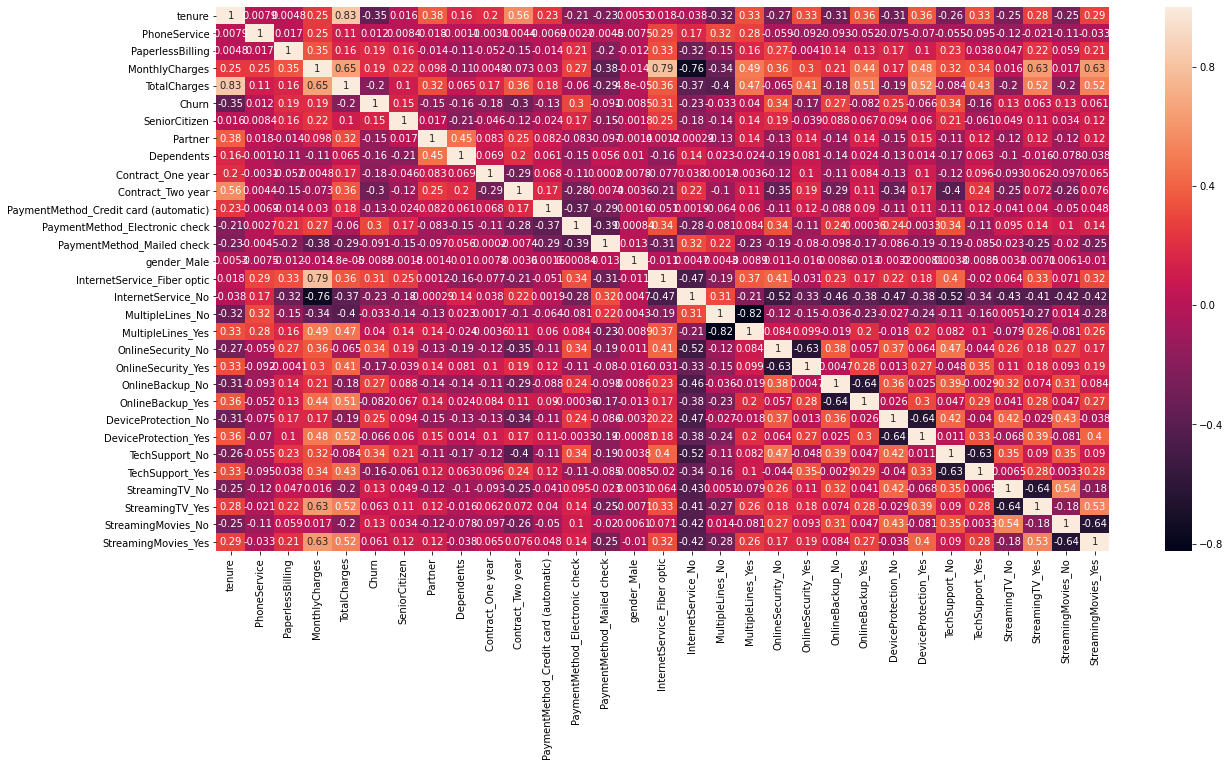

In [227]:
# Let's see the correlation matrix
plt.figure(figsize=(20,10)) # Size the figure
sns.heatmap(telecom.corr(),annot=True)
plt.show()

### Dropping highly correlated dummy variables


In [228]:
X_test = X_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                       'StreamingTV_No','StreamingMovies_No'], 1)
X_train = X_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                         'StreamingTV_No','StreamingMovies_No'], 1)

## Checking the Correlation Matrix
After dropping highly correlated variables now let's check the correlation matrix again

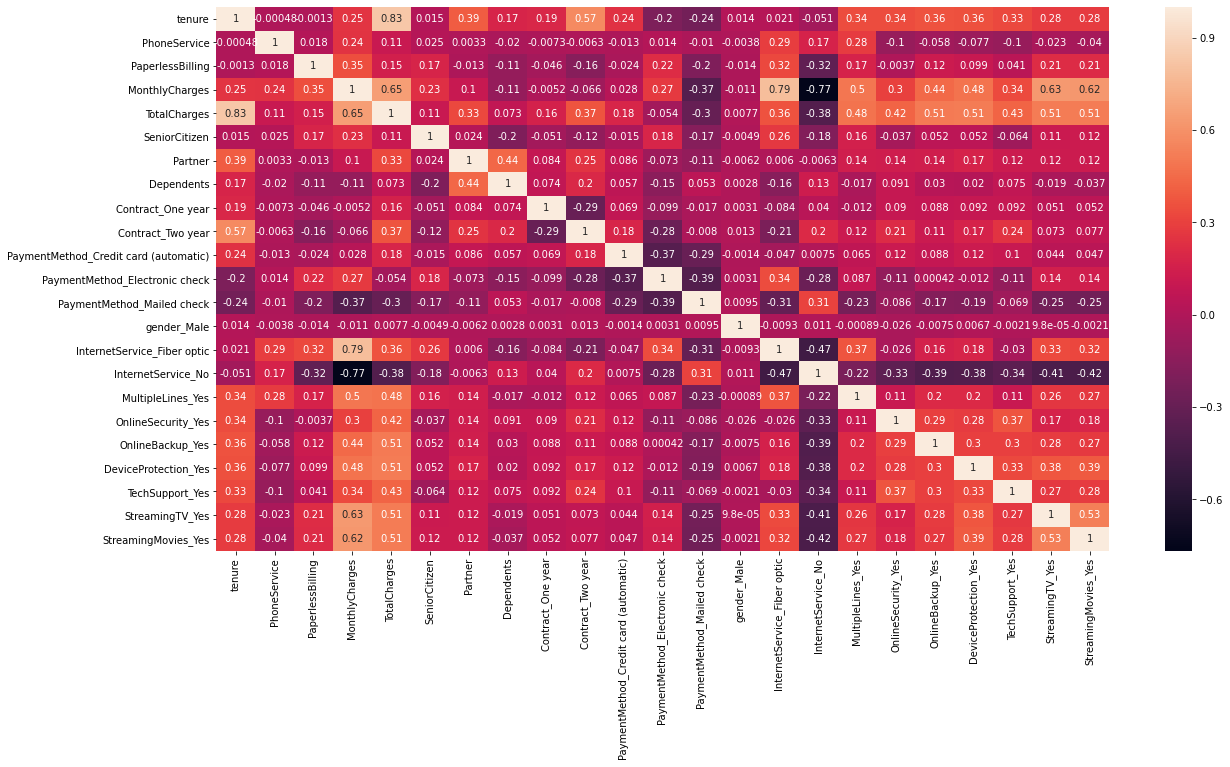

In [229]:
# Let's see the correlation matrix
plt.figure(figsize=(20,10)) # Size the figure
sns.heatmap(X_train.corr(),annot=True)
plt.show()

### Step 7: Model Building

Let's start by splitting our data into a training set and a test set

### Running First Training Model

In [230]:
import statsmodels.api as sm

In [231]:
# Logistic regression model
logm1=sm.GLM(y_train,(sm.add_constant(X_train)), family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Tue, 28 Jun 2022   Deviance:                       4009.4
Time:                        13:06:24   Pearson chi2:                 6.07e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.9382      1.546     -2.547      0.011      -6.969      -0.908
tenure                                   -1.5172      0.189     -8.015      0.000      -1.888      -1.146
PhoneService                              0.9507      0.789      1.205      0.228      -0.595       2.497
PaperlessBilling                          0.3254      0.090      3.614      0.000       0.149       0.502
MonthlyCharges                           -2.1806      1.160     -1.880      0.060      -4.454       0.092
TotalCharges                              0.7332      0.198      3.705      0.000       0.345       1.121
SeniorCitizen                             0.3984      0.102      3.924      0.000       0.199       0.597
Partner                                   0.0374      0.094      0.399      0.690      -0.146       0.221
Dependents                               -0.1430      0.107     -1.332      0.183      -0.353       0.067
Contract_One year                        -0.6578      0.129     -5.106      0.000      -0.910      -0.405
Contract_Two year                        -1.2455      0.212     -5.874      0.000      -1.661      -0.830
PaymentMethod_Credit card (automatic)    -0.2577      0.137     -1.883      0.060      -0.526       0.011
PaymentMethod_Electronic check            0.1615      0.113      1.434      0.152      -0.059       0.382
PaymentMethod_Mailed check               -0.2536      0.137     -1.845      0.065      -0.523       0.016
gender_Male                              -0.0346      0.078     -0.442      0.658      -0.188       0.119
InternetService_Fiber optic               2.5124      0.967      2.599      0.009       0.618       4.407
InternetService_No                       -2.7792      0.982     -2.831      0.005      -4.703      -0.855
MultipleLines_Yes                         0.5623      0.214      2.628      0.009       0.143       0.982
OnlineSecurity_Yes                       -0.0245      0.216     -0.113      0.910      -0.448       0.399
OnlineBackup_Yes                          0.1740      0.212      0.822      0.411      -0.241       0.589
DeviceProtection_Yes                      0.3229      0.215      1.501      0.133      -0.099       0.744
TechSupport_Yes                          -0.0305      0.216     -0.141      0.888      -0.455       0.394
StreamingTV_Yes                           0.9598      0.396      2.423      0.015       0.183       1.736
StreamingMovies_Yes                       0.8484      0.396      2.143      0.032       0.072       1.624
=========================================================================================================
"""

### Step 8: Feature Selection Using RFE

In [232]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [233]:
from sklearn.feature_selection import RFE
rfe=RFE(logreg,15) #running RFE with 13 variables as output
rfe=rfe.fit(X_train,y_train)

In [234]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('tenure', True, 1),
 ('PhoneService', False, 3),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', True, 1),
 ('TotalCharges', True, 1),
 ('SeniorCitizen', True, 1),
 ('Partner', False, 7),
 ('Dependents', False, 6),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', True, 1),
 ('PaymentMethod_Electronic check', False, 4),
 ('PaymentMethod_Mailed check', True, 1),
 ('gender_Male', False, 8),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', True, 1),
 ('MultipleLines_Yes', True, 1),
 ('OnlineSecurity_Yes', False, 2),
 ('OnlineBackup_Yes', False, 5),
 ('DeviceProtection_Yes', False, 9),
 ('TechSupport_Yes', True, 1),
 ('StreamingTV_Yes', True, 1),
 ('StreamingMovies_Yes', True, 1)]

In [235]:
X_train.columns[rfe.support_]

Index(['tenure', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'SeniorCitizen', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes'],
      dtype='object')

In [236]:
col=X_train.columns[rfe.support_]

In [237]:
X_train.columns[~rfe.support_]

Index(['PhoneService', 'Partner', 'Dependents',
       'PaymentMethod_Electronic check', 'gender_Male', 'OnlineSecurity_Yes',
       'OnlineBackup_Yes', 'DeviceProtection_Yes'],
      dtype='object')

### Assessing the model with StatsModels

you use the GLM (Generalized Linear Models) method of the library statsmodels. 'Binomial()' in the 'family' argument tells statsmodels that it needs to fit a logit curve to a binomial data (i.e. in which the target will have just two classes, here 'Churn' and 'Non-Churn').

In [240]:
X_train_sm = sm.add_constant(X_train[col])
logm2=sm.GLM(y_train,(sm.add_constant(X_train[col])), family=sm.families.Binomial())
res=logm2.fit()
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4906
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2011.1
Date:                Tue, 28 Jun 2022   Deviance:                       4022.2
Time:                        14:16:39   Pearson chi2:                 6.25e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.2462      0.189    -11.879      0.000      -2.617      -1.876
tenure                                   -1.5596      0.187     -8.334      0.000      -1.926      -1.193
PaperlessBilling                          0.3436      0.090      3.832      0.000       0.168       0.519
MonthlyCharges                           -0.9692      0.199     -4.878      0.000      -1.359      -0.580
TotalCharges                              0.7421      0.197      3.764      0.000       0.356       1.128
SeniorCitizen                             0.4296      0.100      4.312      0.000       0.234       0.625
Contract_One year                        -0.6830      0.128     -5.342      0.000      -0.934      -0.432
Contract_Two year                        -1.2931      0.211     -6.138      0.000      -1.706      -0.880
PaymentMethod_Credit card (automatic)    -0.3724      0.113     -3.308      0.001      -0.593      -0.152
PaymentMethod_Mailed check               -0.3723      0.111     -3.345      0.001      -0.591      -0.154
InternetService_Fiber optic               1.5865      0.216      7.342      0.000       1.163       2.010
InternetService_No                       -1.6897      0.216     -7.830      0.000      -2.113      -1.267
MultipleLines_Yes                         0.3779      0.104      3.640      0.000       0.174       0.581
TechSupport_Yes                          -0.2408      0.109     -2.210      0.027      -0.454      -0.027
StreamingTV_Yes                           0.5796      0.114      5.102      0.000       0.357       0.802
StreamingMovies_Yes                       0.4665      0.111      4.197      0.000       0.249       0.684
=========================================================================================================
"""

In [241]:
X_train_sm.head()

,const,tenure,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No,MultipleLines_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
879,1.0,0.019693,1,-0.338074,-0.276449,0,0,0,0,0,0,0,1,0,0,0
5790,1.0,0.305384,1,-0.464443,-0.112702,0,0,0,0,0,0,0,0,0,1,1
6498,1.0,-1.286319,1,0.581425,-0.974430,0,0,0,0,0,1,0,0,0,0,0
880,1.0,-0.919003,1,1.505913,-0.550676,0,0,0,0,0,1,0,0,1,1,1
2784,1.0,-1.163880,1,1.106854,-0.835971,0,0,0,0,0,1,0,0,1,1,1


In [246]:
# Getting the predicted values on the train set
y_train_pred=res.predict(X_train_sm)
y_train_pred[:10]

879     0.192642
5790    0.275624
6498    0.599507
880     0.513571
2784    0.648233
3874    0.414846
5387    0.431184
6623    0.801788
4465    0.228194
5364    0.504575
dtype: float64

In [247]:
y_train_pred=y_train_pred.values.reshape(-1)



In [248]:
y_train_pred[:10]

array([0.19264205, 0.27562384, 0.59950707, 0.51357126, 0.64823272,
       0.41484553, 0.43118361, 0.80178789, 0.22819404, 0.50457542])

### Creating a dataframe with the actual churn flag and the predicted probabilities

In [249]:
y_train_pred_final=pd.DataFrame({'Churn':y_train.values, 'Churn_prob':y_train_pred})
y_train_pred_final['CustID']=y_train.index
y_train_pred_final.head()

,Churn,Churn_prob,CustID
0,0,0.192642,879
1,0,0.275624,5790
2,1,0.599507,6498
3,1,0.513571,880
4,1,0.648233,2784


### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [307]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_prob,CustID,predicted,Churn_Prob
0,0,0.192642,879,0,0.245817
1,0,0.275624,5790,0,0.265361
2,1,0.599507,6498,1,0.669410
3,1,0.513571,880,1,0.630970
4,1,0.648233,2784,1,0.682916


In [308]:
from sklearn import metrics

In [309]:
#confusion matrix
confusion=metrics.confusion_matrix(y_train_pred_final.Churn,y_train_pred_final.predicted)
print(confusion)

[[3275  360]
 [ 574  713]]


In [310]:
#                                Predicted        
#                       
#                       not_churn            Churn
#
#            not_churn   3270                365
# Actual
#
#            Churn       579                 708

In [311]:
#Let's check the overall accuracy
print(metrics.accuracy_score(y_train_pred_final.Churn,y_train_pred_final.predicted))

0.8102397399431126


### Manual Feature elimination
Checking VIFs

In [312]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [313]:
# Create a dataframe that will contain the names of all the features variables and their respective VIFs
vif=pd.DataFrame()
vif['Features']=X_train[col].columns
vif['VIF']=[variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
4,Contract_Two year,2.98
7,InternetService_Fiber optic,2.67
12,StreamingMovies_Yes,2.54
11,StreamingTV_Yes,2.51
1,PaperlessBilling,2.45
9,MultipleLines_Yes,2.24
0,tenure,2.04
8,InternetService_No,2.03
10,TechSupport_Yes,1.92
3,Contract_One year,1.78


There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'PhoneService' has the highest VIF. So let's start by dropping that.

In [314]:
col = col.drop('MonthlyCharges', 1)
col

KeyError: "['MonthlyCharges'] not found in axis"

In [315]:
# Let's re-run the model using the selected variable
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4908
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2025.9
Date:                Wed, 29 Jun 2022   Deviance:                       4051.9
Time:                        22:57:33   Pearson chi2:                 5.25e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.6577      0.127    -13.094      0.000      -1.906      -1.410
tenure                                   -0.9426      0.065    -14.480      0.000      -1.070      -0.815
PaperlessBilling                          0.3455      0.089      3.877      0.000       0.171       0.520
SeniorCitizen                             0.4597      0.100      4.613      0.000       0.264       0.655
Contract_One year                        -0.7218      0.127     -5.702      0.000      -0.970      -0.474
Contract_Two year                        -1.2987      0.208     -6.237      0.000      -1.707      -0.891
PaymentMethod_Credit card (automatic)    -0.3874      0.113     -3.442      0.001      -0.608      -0.167
PaymentMethod_Mailed check               -0.3307      0.110     -3.020      0.003      -0.545      -0.116
InternetService_Fiber optic               0.8052      0.097      8.272      0.000       0.614       0.996
InternetService_No                       -0.9726      0.155     -6.261      0.000      -1.277      -0.668
MultipleLines_Yes                         0.2097      0.092      2.279      0.023       0.029       0.390
TechSupport_Yes                          -0.4046      0.101     -4.019      0.000      -0.602      -0.207
StreamingTV_Yes                           0.3390      0.094      3.619      0.000       0.155       0.523
StreamingMovies_Yes                       0.2428      0.093      2.598      0.009       0.060       0.426
=========================================================================================================
"""

In [316]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [317]:
y_train_pred[:10]

array([0.24581699, 0.26536078, 0.66940978, 0.63097033, 0.68291606,
       0.39952622, 0.27582791, 0.79816753, 0.19878625, 0.52911878])

In [318]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [319]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_prob,CustID,predicted,Churn_Prob
0,0,0.192642,879,0,0.245817
1,0,0.275624,5790,0,0.265361
2,1,0.599507,6498,1,0.669410
3,1,0.513571,880,1,0.630970
4,1,0.648233,2784,1,0.682916


In [320]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8061763510767981


So overall the accuracy hasn't dropped much.

In [321]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Contract_Two year,2.98
7,InternetService_Fiber optic,2.67
12,StreamingMovies_Yes,2.54
11,StreamingTV_Yes,2.51
1,PaperlessBilling,2.45
9,MultipleLines_Yes,2.24
0,tenure,2.04
8,InternetService_No,2.03
10,TechSupport_Yes,1.92
3,Contract_One year,1.78


In [322]:
# Let's drop TotalCharges since it has a high VIF
col = col.drop('TotalCharges')
col

KeyError: "['TotalCharges'] not found in axis"

In [323]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4908
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2025.9
Date:                Wed, 29 Jun 2022   Deviance:                       4051.9
Time:                        22:57:34   Pearson chi2:                 5.25e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.6577      0.127    -13.094      0.000      -1.906      -1.410
tenure                                   -0.9426      0.065    -14.480      0.000      -1.070      -0.815
PaperlessBilling                          0.3455      0.089      3.877      0.000       0.171       0.520
SeniorCitizen                             0.4597      0.100      4.613      0.000       0.264       0.655
Contract_One year                        -0.7218      0.127     -5.702      0.000      -0.970      -0.474
Contract_Two year                        -1.2987      0.208     -6.237      0.000      -1.707      -0.891
PaymentMethod_Credit card (automatic)    -0.3874      0.113     -3.442      0.001      -0.608      -0.167
PaymentMethod_Mailed check               -0.3307      0.110     -3.020      0.003      -0.545      -0.116
InternetService_Fiber optic               0.8052      0.097      8.272      0.000       0.614       0.996
InternetService_No                       -0.9726      0.155     -6.261      0.000      -1.277      -0.668
MultipleLines_Yes                         0.2097      0.092      2.279      0.023       0.029       0.390
TechSupport_Yes                          -0.4046      0.101     -4.019      0.000      -0.602      -0.207
StreamingTV_Yes                           0.3390      0.094      3.619      0.000       0.155       0.523
StreamingMovies_Yes                       0.2428      0.093      2.598      0.009       0.060       0.426
=========================================================================================================
"""

In [324]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [325]:
y_train_pred[:10]

array([0.24581699, 0.26536078, 0.66940978, 0.63097033, 0.68291606,
       0.39952622, 0.27582791, 0.79816753, 0.19878625, 0.52911878])

In [326]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [327]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_prob,CustID,predicted,Churn_Prob
0,0,0.192642,879,0,0.245817
1,0,0.275624,5790,0,0.265361
2,1,0.599507,6498,1,0.669410
3,1,0.513571,880,1,0.630970
4,1,0.648233,2784,1,0.682916


In [328]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8061763510767981


The accuracy is still practically the same.

#### Let's now check the VIFs again

In [329]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Contract_Two year,2.98
7,InternetService_Fiber optic,2.67
12,StreamingMovies_Yes,2.54
11,StreamingTV_Yes,2.51
1,PaperlessBilling,2.45
9,MultipleLines_Yes,2.24
0,tenure,2.04
8,InternetService_No,2.03
10,TechSupport_Yes,1.92
3,Contract_One year,1.78


All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [330]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[3278,  357],
       [ 597,  690]], dtype=int64)

In [331]:
# Actual/Predicted     not_churn    churn
        # not_churn        3278      357
        # churn            597       690 

In [332]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.8061763510767981

### Metrics beyond simply accuracy

In [335]:
TP=confusion[1,1]#True positive
TN=confusion[0,0]#True Negative
FP=confusion[0,1]# False Positive
FN=confusion[1,0]# False Negative

In [336]:
##
##---------------------------------------------------------------------
##|Actual/predict     |      NO                 |           Yes       |
##--------------------------------------------------------------------
##|     No            |      TN                 |          FP         |
##                    |                         |                     |
##|--------------------------------------------------------------------
##                    |      FN                 |          TP         |
##|      Yes
##                    |                         |                     |
##|--------------------------------------------------------------------

In [338]:
# Sensitivity of our logistic regression Model
print(TP/float(TP+FN)) #Actual Yes's vs Predict output

0.5361305361305362


In [339]:
# Specificity 
print(TN/float(TN+FP))  #Actual NO's vs Predict Output

0.9017881705639614


In [340]:
# False postive rate -predicting churn when customer does not have churned
print(FP/float(TN+FP))

0.09821182943603851


In [342]:
# postive Predictive Value
print(TP/float(FP+TP))  

0.6590257879656161


In [343]:
# Negative Predictive Value
print(TN/float(TN+FN))  

0.8459354838709677


### Step 9: Plotting the ROC Curve
An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [349]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None


In [350]:
fpr,tpr,thresholds=metrics.roc_curve(y_train_pred_final.Churn,y_train_pred_final.Churn_prob,drop_intermediate=False)

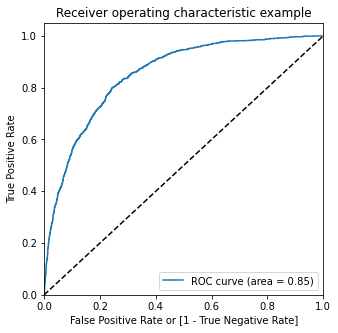

In [351]:
draw_roc(y_train_pred_final.Churn,y_train_pred_final.Churn_prob)

### Step 10: Finding Optimal Cutoff Point
Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [353]:
# Let's create columns with different probability cutoffs
numbers=[float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]=y_train_pred_final.Churn_Prob.map(lambda x:1 if x>i else 0)
y_train_pred_final.head()

,Churn,Churn_prob,CustID,predicted,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.192642,879,0,0.245817,1,1,1,0,0,0,0,0,0,0
1,0,0.275624,5790,0,0.265361,1,1,1,0,0,0,0,0,0,0
2,1,0.599507,6498,1,0.669410,1,1,1,1,1,1,1,0,0,0
3,1,0.513571,880,1,0.630970,1,1,1,1,1,1,1,0,0,0
4,1,0.648233,2784,1,0.682916,1,1,1,1,1,1,1,0,0,0


In [382]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df=pd.DataFrame(columns=['prob','accurracy','Sensitivity','Specificity'])
from sklearn.metrics import confusion_matrix
#TP=confusion[1,1]#True positive
#TN=confusion[0,0]#True Negative
#FP=confusion[0,1]# False Positive
#FN=confusion[1,0]# False Negative
num=[float(x)/10 for x in range(10)]
for i in num:
    cm1=metrics.confusion_matrix(y_train_pred_final.Churn,y_train_pred_final[i])
    total1=sum(sum(cm1))
    print("========================================================================")
    print(cm1)
    print(cm1[0,0]) 
    print(cm1[1,0])
    print(sum(sum(cm1)))
    accurracy=(cm1[0,0]+cm1[1,1])/total1
    Sensitivity=cm1[1,1]/(cm1[1,0]+cm1[1,1]) #TP/FN+TP
    Specificity=cm1[0,0]/(cm1[0,0]+cm1[0,1]) #TN/TN+FP
    cutoff_df.loc[i]=[i,accurracy,Sensitivity,Specificity]
    print(cutoff_df.loc[i])
    print("========================================================================")
    







[[   0 3635]
 [   0 1287]]
0
0
4922
prob           0.000000
accurracy      0.261479
Sensitivity    1.000000
Specificity    0.000000
Name: 0.0, dtype: float64
[[1813 1822]
 [  73 1214]]
1813
73
4922
prob           0.100000
accurracy      0.614994
Sensitivity    0.943279
Specificity    0.498762
Name: 0.1, dtype: float64
[[2464 1171]
 [ 198 1089]]
2464
198
4922
prob           0.200000
accurracy      0.721861
Sensitivity    0.846154
Specificity    0.677854
Name: 0.2, dtype: float64
[[2791  844]
 [ 288  999]]
2791
288
4922
prob           0.300000
accurracy      0.770012
Sensitivity    0.776224
Specificity    0.767813
Name: 0.3, dtype: float64
[[3072  563]
 [ 468  819]]
3072
468
4922
prob           0.400000
accurracy      0.790532
Sensitivity    0.636364
Specificity    0.845117
Name: 0.4, dtype: float64
[[3278  357]
 [ 597  690]]
3278
597
4922
prob           0.500000
accurracy      0.806176
Sensitivity    0.536131
Specificity    0.901788
Name: 0.5, dtype: float64
[[3438  197]
 [ 797  490]]
3

In [383]:
print(cutoff_df)

     prob  accurracy  Sensitivity  Specificity
0.0   0.0   0.261479     1.000000     0.000000
0.1   0.1   0.614994     0.943279     0.498762
0.2   0.2   0.721861     0.846154     0.677854
0.3   0.3   0.770012     0.776224     0.767813
0.4   0.4   0.790532     0.636364     0.845117
0.5   0.5   0.806176     0.536131     0.901788
0.6   0.6   0.798050     0.380730     0.945805
0.7   0.7   0.776310     0.196581     0.981568
0.8   0.8   0.747867     0.041181     0.998074
0.9   0.9   0.738521     0.000000     1.000000


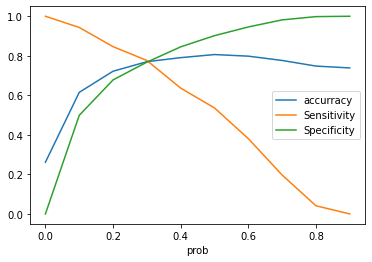

In [384]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob',y=['accurracy','Sensitivity','Specificity'])
plt.show()

### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [385]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Churn,Churn_prob,CustID,predicted,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.192642,879,0,0.245817,1,1,1,0,0,0,0,0,0,0,0
1,0,0.275624,5790,0,0.265361,1,1,1,0,0,0,0,0,0,0,0
2,1,0.599507,6498,1,0.669410,1,1,1,1,1,1,1,0,0,0,1
3,1,0.513571,880,1,0.630970,1,1,1,1,1,1,1,0,0,0,1
4,1,0.648233,2784,1,0.682916,1,1,1,1,1,1,1,0,0,0,1


In [386]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.7700121901665989

In [387]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion2

array([[2791,  844],
       [ 288,  999]], dtype=int64)

In [388]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [389]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7762237762237763

In [390]:
# Let us calculate specificity
TN / float(TN+FP)

0.7678129298486933

In [391]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))


0.23218707015130674


In [392]:
# Positive predictive value 
print (TP / float(TP+FP))

0.5420510037981552


In [393]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9064631373822669


### Precision and Recall

In [395]:
#Looking at the confusion matrix again

In [397]:
confusion=metrics.confusion_matrix(y_train_pred_final.Churn,y_train_pred_final.predicted)
confusion

array([[3278,  357],
       [ 597,  690]], dtype=int64)

In [398]:
##
##---------------------------------------------------------------------
##|Actual/predict     |      NO                 |           Yes       |
##--------------------------------------------------------------------
##|     No            |      TN                 |          FP         |
##                    |                         |                     |
##|--------------------------------------------------------------------
##                    |      FN                 |          TP         |
##|      Yes
##                    |                         |                     |
##|--------------------------------------------------------------------

# Precision
##### TP/(TP+FP)


In [401]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6590257879656161

# Recall
##### TP/(TP+FN)

In [403]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.5361305361305362

Using sklearn utilities for the same

In [404]:
from sklearn.metrics import precision_score, recall_score

In [405]:
?precision_score

In [406]:
precision_score(y_train_pred_final.Churn,y_train_pred_final.predicted)

0.6590257879656161

In [407]:
recall_score(y_train_pred_final.Churn,y_train_pred_final.predicted)

0.5361305361305362

### Precision and recall tradeoff

In [408]:
from sklearn.metrics import precision_recall_curve


In [409]:
p,r,thresholds=precision_recall_curve(y_train_pred_final.Churn,y_train_pred_final.Churn_Prob)

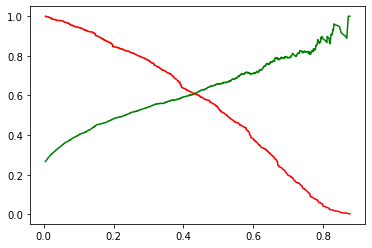

In [410]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step 11: Making predictions on the test set

In [411]:
X_test[['tenure','MonthlyCharges','TotalCharges']]=scaler.fit_transform(X_test[['tenure','MonthlyCharges','TotalCharges']])
X_test.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
942,-0.332755,1,1,0.501209,-0.115603,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
3730,1.006613,1,1,1.319754,1.616282,0,1,0,0,0,...,0,1,0,1,0,1,1,0,1,1
1761,1.047200,1,1,-1.338442,-0.330920,0,0,0,0,1,...,1,0,1,1,0,0,0,0,0,0
2283,-1.266254,1,1,0.225593,-0.967971,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
1872,0.357223,1,0,-1.496174,-0.644288,0,1,1,0,1,...,0,0,1,0,0,0,0,0,0,0


In [412]:
X_test=X_test[col]
X_test.head()

,tenure,PaperlessBilling,SeniorCitizen,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No,MultipleLines_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
942,-0.332755,1,0,0,0,1,0,1,0,0,0,0,1
3730,1.006613,1,0,0,0,1,0,1,0,1,0,1,1
1761,1.047200,1,0,0,1,1,0,0,1,1,0,0,0
2283,-1.266254,1,0,0,0,0,1,1,0,0,0,0,0
1872,0.357223,0,0,0,1,0,0,0,1,0,0,0,0


In [413]:
X_test_sm=sm.add_constant(X_test)

### Making predictions on the test set

In [457]:
y_test_pred=res.predict(X_test_sm)

In [458]:
y_test_pred[:10]

942     0.416316
3730    0.258890
1761    0.008592
2283    0.588052
1872    0.013846
1970    0.689127
2532    0.283175
1616    0.008924
2485    0.598433
5914    0.143449
dtype: float64

In [459]:
# Converting y_pred to a dataframe whihis an array
y_pred_1=pd.DataFrame(y_test_pred)

In [460]:
# Let's see the head
y_pred_1.head()

,0
942,0.416316
3730,0.258890
1761,0.008592
2283,0.588052
1872,0.013846


In [461]:
#Converting y_test to dataframe
y_test_df=pd.DataFrame(y_test)
y_test_df

,Churn
942,0
3730,1
1761,0
2283,1
1872,0
...,...
1289,0
3508,0
6765,0
3598,0


In [462]:
#Putting CustID to index
y_test_df['CustID']=y_test_df.index
y_test_df

,Churn,CustID
942,0,942
3730,1,3730
1761,0,1761
2283,1,2283
1872,0,1872
...,...,...
1289,0,1289
3508,0,3508
6765,0,6765
3598,0,3598


In [463]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [464]:
y_pred_1

,0
0,0.416316
1,0.258890
2,0.008592
3,0.588052
4,0.013846
...,...
2105,0.022913
2106,0.053906
2107,0.008311
2108,0.498891


In [465]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [466]:
y_pred_final.head()

,Churn,CustID,0
0,0,942,0.416316
1,1,3730,0.258890
2,0,1761,0.008592
3,1,2283,0.588052
4,0,1872,0.013846


In [467]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [468]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['CustID','Churn','Churn_Prob'], axis=1)
y_pred_final.head()

,CustID,Churn,Churn_Prob
0,942,0,0.416316
1,3730,1,0.258890
2,1761,0,0.008592
3,2283,1,0.588052
4,1872,0,0.013846


In [469]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [470]:
y_pred_final.head()

,CustID,Churn,Churn_Prob,final_predicted
0,942,0,0.416316,0
1,3730,1,0.258890,0
2,1761,0,0.008592,0
3,2283,1,0.588052,1
4,1872,0,0.013846,0


In [471]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Churn, y_pred_final.final_predicted)

0.7834123222748816

In [472]:
confusion2 = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.final_predicted )
confusion2

array([[1288,  240],
       [ 217,  365]], dtype=int64)

In [473]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [474]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.627147766323024

In [475]:
# Let us calculate specificity
TN / float(TN+FP)

0.8429319371727748